In [1]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
from IPython.display import display

# Part 2: Gaussian Filtering (35 points)

#### 1.(3 points) boxfilter(n)

In [39]:
def boxfilter(n):
  # throw error if n is odd
  assert n % 2 != 0, "Dimension must be odd"
  # generate a n by n array with entry value 1/n^2
  return np.full((n, n), 1 / (n * n))

In [40]:
print(boxfilter(3))

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [41]:
# print(boxfilter(4))

AssertionError: Dimension must be odd

In [42]:
print(boxfilter(5))

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


#### 2.(5 points) gauss1d(sigma)

In [43]:
def gauss1d(sigma):
  # 1D array with length 6*sigma rounded up to the next odd integer
  n = int(np.ceil(sigma * 6));
  if n % 2 == 0:
    n += 1
  # generate and normalize a 1D Gaussian filter
  x = np.arange(- n // 2 + 1, n // 2 + 1)
  gaussian_1d = np.exp(-x**2 / (2 * sigma**2))
  gaussian_1d /= np.sum(gaussian_1d)
  return gaussian_1d

print(f'gauss1d(0.3) :\n {gauss1d(0.3)} \n' )
print(f'gauss1d(0.5) :\n {gauss1d(0.5)} \n')
print(f'gauss1d(1) :\n {gauss1d(1)} \n')
print(f'gauss1d(2) :\n {gauss1d(2)} \n')

gauss1d(0.3) :
 [0.00383626 0.99232748 0.00383626] 

gauss1d(0.5) :
 [0.10650698 0.78698604 0.10650698] 

gauss1d(1) :
 [0.00443305 0.05400558 0.24203623 0.39905028 0.24203623 0.05400558
 0.00443305] 

gauss1d(2) :
 [0.0022182  0.00877313 0.02702316 0.06482519 0.12110939 0.17621312
 0.19967563 0.17621312 0.12110939 0.06482519 0.02702316 0.00877313
 0.0022182 ] 



#### 3.(5 points) gauss2d(sigma)

In [36]:
def gauss2d(sigma):
  # convert 1D array to 2D array
  f = gauss1d(sigma)[np.newaxis]
  # generate a 2D Gaussian by convolution of a 1D Gaussian with its transpose
  return signal.convolve2d(f, f.transpose())

print(f'gauss2d(0.5) :\n {gauss2d(0.5)} \n')
print(f'gauss2d(1) :\n {gauss2d(1)} \n')

gauss2d(0.5) :
 [[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]] 

gauss2d(1) :
 [[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]] 



#### 4.(10 points) convolve2d_manual(array, filter)

In [57]:
## (a)
def convolve2d_manual(array, filter):
  # print(f'array : {array} \n')
  # print(f'filter : {filter} \n')
  output = np.zeros_like(array)
  # Compute the padding size of zeros
  filter_h, filter_w = filter.shape
  pad_h = filter_h // 2
  pad_w = filter_w // 2
  # Create a padded version of the image (with zero padding)
  padded_image = np.pad(array, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
  # convolve the padded image with filter
  for i in range(len(array)):
    for j in range(len(array[0])):
        neighborhood = padded_image[i:i + filter_h, j:j + filter_w]
        # Perform element-wise multiplication with filter and sum up
        output[i, j] = np.sum(neighborhood * filter)
  return output


## (b)
def gaussconvolve2d_manual(array,sigma):
  gauss2d_filter = gauss2d(sigma)
  return convolve2d_manual(array, gauss2d_filter)


Original dog image:


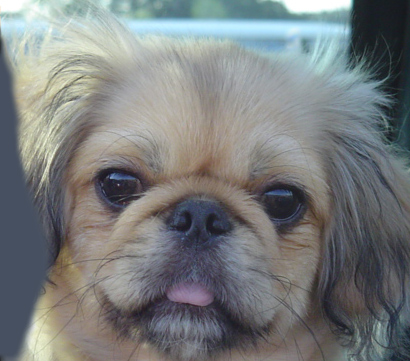


 Filtered dog image: 


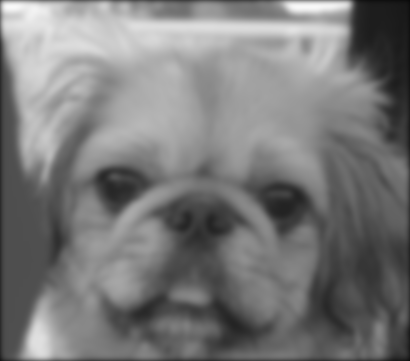

In [63]:
## (c)

# from google.colab import files
# uploaded = files.upload()

dog_img = Image.open('dog.jpg')
# print(dog_img.size, dog_img.mode, dog_img.format)

# Convert to greyscale and numpy array
dog_greyscale = dog_img.convert('L')
dog_gs_img_arr = np.asarray(dog_greyscale)
# Apply filter and convert back to unsigned integer format image
dog_convolved_arr = gaussconvolve2d_manual(dog_gs_img_arr, 3)
dog_grey_gauss_img = Image.fromarray(dog_convolved_arr.astype('uint8'))

## (d)
print("Original dog image:")
display(dog_img)
print("\n Filtered dog image: ")
display(dog_grey_gauss_img)

#### 5.(7 points) gaussconvolve2d_scipy(array,sigma)

In [69]:
## (a)
def gaussconvolve2d_scipy(array,sigma):
  filter_2d = gauss2d(sigma)
  return signal.convolve2d(array, filter_2d, 'same')

**(a) Why does Scipy have separate functions signal.convolve2d and signal.correlate2d?**

*This is because `signal.convolve2d` and `signal.correlate2d` perform different mathematical operations. Convolution flips the kernel before applying it to the image, while correlation uses the kernel as-is, without flipping.
<br> In cases where the kernel is symmetric (like a Gaussian filter), both functions will produce the same result. However, when the kernel is asymmetric, they will yield different outputs.*


Original dog image:


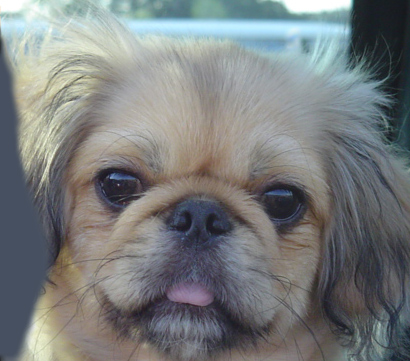


 gaussconvolve2d_scipy() filtered dog image: 


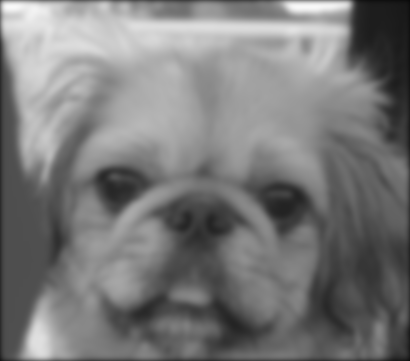

In [71]:
## (b)
# Apply filter using gaussconvolve2d_scipy()
# and convert back to unsigned integer format image
dog_gc2dscipy_arr = gaussconvolve2d_scipy(dog_gs_img_arr, 3)
dog_gc2dscipy_img = Image.fromarray(dog_gc2dscipy_arr.astype('uint8'))

## (c)
print("Original dog image:")
display(dog_img)
print("\n gaussconvolve2d_scipy() filtered dog image: ")
display(dog_gc2dscipy_img)

#### 6.(2 points)How much time it takes to convolve the dog image

In [79]:
import time
# Calculate duration for gaussconvolve2d_manual() operation
t1 = time.time()
gaussconvolve2d_manual(dog_gs_img_arr, 10)
manual_duration = time.time() - t1 # duration in seconds
print(f"gaussconvolve2d_manual() duration : {manual_duration}s")
# Calculate duration for gaussconvolve2d_scipy() operation
t2 = time.time()
gaussconvolve2d_scipy(dog_gs_img_arr, 10)
scipy_duration = time.time() - t2
print(f"gaussconvolve2d_scipy() duration : {scipy_duration}s")


gaussconvolve2d_manual() duration : 2.068298816680908s
gaussconvolve2d_scipy() duration : 1.509620189666748s


#### 7.(3 points) Separability

_If the image is `n x n` and the filter is `m x m`, Gaussian convolution can be made more efficient by leveraging the **separability** of the 2D Gaussian filter. Instead of directly applying the `m x m` filter to the `n x n` image, which would take `O(n^2*m^2)` operations, we can decompose the 2D Gaussian filter into two 1D Gaussian filters. First, we convolve the image with the 1D Gaussian filter along the rows, then we convolve the result with the 1D Gaussian filter along the columns. At each pixel, this process involves `2m` multiplications (one for the row convolution and one for the column convolution). Since there are `n * n` pixels in the image, the total number of operations is reduced to `O(2m*n^2)`. This is more efficient, especially for large `n` and `m`, as the direct 2D convolution would have taken `O(n^2*m^2)` operations._



# Part 3: Hybrid Images (10 points)

#### 1.(3 points) Create a blurred version of the one of the paired images

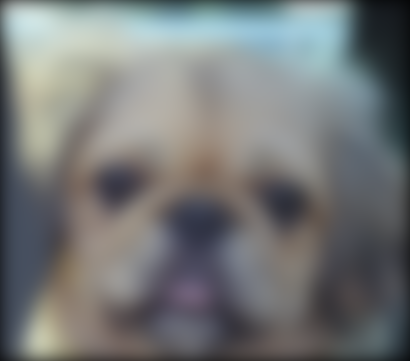

In [90]:
# from google.colab import files
# uploaded = files.upload()

# Function to blur image using Gaussian filter on RGB channels
def apply_gaussian_blur(image_path, sigma):
    img = Image.open(image_path)
    img = img.convert('RGB')
    # Convert the image to a NumPy array (RGB channels) and separate channels
    img_array = np.array(img)
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    # Apply Gaussian filter to each channel separately
    r_blurred = gaussconvolve2d_scipy(r, sigma=sigma)
    g_blurred = gaussconvolve2d_scipy(g, sigma=sigma)
    b_blurred = gaussconvolve2d_scipy(b, sigma=sigma)
    # Return the blurred channels
    return r_blurred, g_blurred, b_blurred


# Function to combine the channels back to an RGB image
def combine_channels_to_image(r_channel, g_channel, b_channel):
    # Clamp the values of each channel to be between 0 and 255 to avoid artifacts
    r_channel_clamped = np.clip(r_channel, 0, 255)
    g_channel_clamped = np.clip(g_channel, 0, 255)
    b_channel_clamped = np.clip(b_channel, 0, 255)
    # Stack and convert the channels to form an RGB image
    combined_img_array = np.stack([r_channel_clamped, g_channel_clamped, b_channel_clamped], axis=-1)
    combined_img = Image.fromarray(np.uint8(combined_img_array))

    return combined_img

r, g, b = apply_gaussian_blur('0b_dog.bmp', 10)
display(combine_channels_to_image(r, g, b))


#### 2.(3 points) Create a high frequency version of the second from the two (paired) images

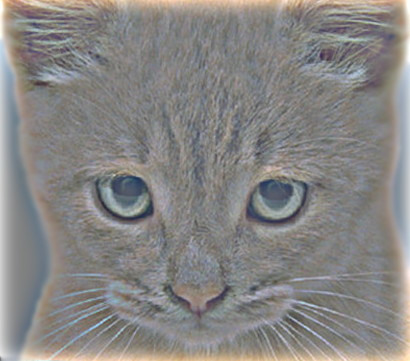

In [91]:
def create_high_frequency(image_path, sigma):
  img = Image.open(image_path)
  img = img.convert('RGB')
  # Convert the image to a NumPy array (RGB channels) and separate channels
  img_array = np.array(img, dtype='float')
  r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
  # get blurred RGB channels')
  r_blurred, g_blurred, b_blurred = apply_gaussian_blur(image_path, sigma)
  # Compute high-frequency image by subtracting the blurred version from the original
  r_high_freq = r - r_blurred
  g_high_freq = g - g_blurred
  b_high_freq = b - b_blurred
  ## Add 128 to each channel to bring the range of values into positive (for visualization)
  # r_high_freq_visual = r_high_freq + 128
  # g_high_freq_visual = g_high_freq + 128
  # b_high_freq_visual = b_high_freq + 128
  # return r_high_freq_visual, g_high_freq_visual, b_high_freq_visual
  return r_high_freq, g_high_freq, b_high_freq

r, g, b = create_high_frequency('0a_cat.bmp', 10)
# show high frequency image (visualized by adding 128):
display(combine_channels_to_image(r+128, g+128, b+128))

#### 3.(4 points) Add the low and high frequency images (per channel)

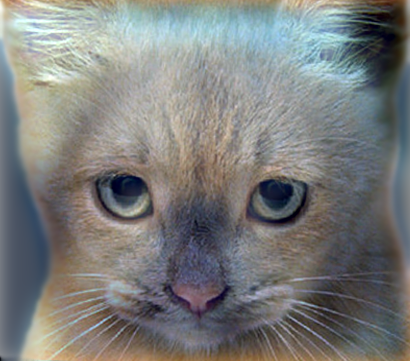

In [94]:
# Function to add the low and high frequency images
def add_low_and_high_freq(img1_path, img2_path, sigma):
    # Get the low-frequency and high-frequency channels
    r_blurred, g_blurred, b_blurred = apply_gaussian_blur(img1_path, sigma)
    r_high_freq, g_high_freq, b_high_freq = create_high_frequency(img2_path, sigma)
    # Add the low and high frequency images per channel
    r_combined = r_blurred + r_high_freq
    g_combined = g_blurred + g_high_freq
    b_combined = b_blurred + b_high_freq
    # Combine the channels into an image with clamped values
    combined_clamped_img = combine_channels_to_image(r_combined, g_combined, b_combined)
    return combined_clamped_img

display(add_low_and_high_freq('0b_dog.bmp','0a_cat.bmp', 10))



 Hybrid of motorcycle (blur) and bicycle (high frequent) images with sigma=1 :


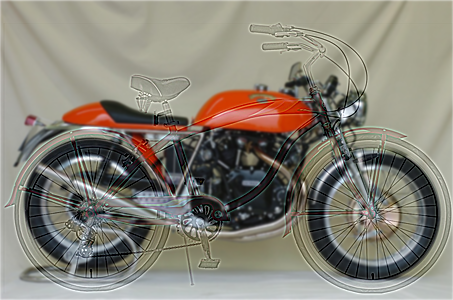


 Hybrid of motorcycle (blur) and bicycle (high frequent) with sigma=3 :


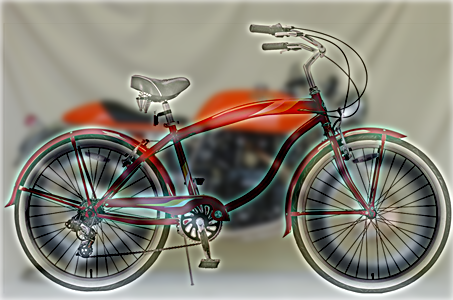


 Hybrid of motorcycle (blur) and bicycle (high frequent) with sigma=8 :


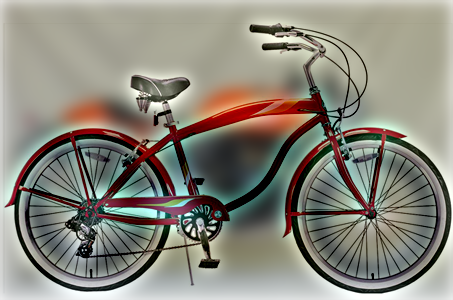

In [106]:
## Experiment with at least 3 provided sets of images or create your own hybrid.
## Illustrate results for 3 different values of sigma for each of the images.

# experiment with the pair of 1b_motorcycle.bmp and 1a_bicycle.bmp
# with sigma 1, 3, 8
print("\n Hybrid of motorcycle (blur) and bicycle (high frequent) images with sigma=1 :")
display(add_low_and_high_freq('1b_motorcycle.bmp','1a_bicycle.bmp', 1))

print("\n Hybrid of motorcycle (blur) and bicycle (high frequent) with sigma=3 :")
display(add_low_and_high_freq('1b_motorcycle.bmp','1a_bicycle.bmp', 3))

print("\n Hybrid of motorcycle (blur) and bicycle (high frequent) with sigma=8 :")
display(add_low_and_high_freq('1b_motorcycle.bmp','1a_bicycle.bmp', 8))


 Hybrid of Einstein (blur) and Marilyn (high frequent) images with sigma=2 :


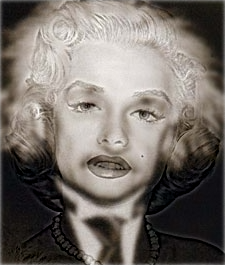


 Hybrid of Einstein (blur) and Marilyn  (high frequent) with sigma=3 :


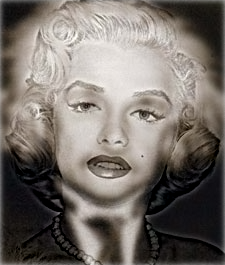


 Hybrid of Einstein (blur) and Marilyn (high frequent) with sigma=4 :


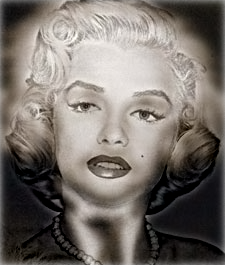

In [107]:
# experiment with the pair of 2a_einstein.bmp and 2b_marilyn.bmp
# with sigma 2, 3, 4
print("\n Hybrid of Einstein (blur) and Marilyn (high frequent) images with sigma=2 :")
display(add_low_and_high_freq('2a_einstein.bmp','2b_marilyn.bmp', 2))

print("\n Hybrid of Einstein (blur) and Marilyn  (high frequent) with sigma=3 :")
display(add_low_and_high_freq('2a_einstein.bmp','2b_marilyn.bmp', 3))

print("\n Hybrid of Einstein (blur) and Marilyn (high frequent) with sigma=4 :")
display(add_low_and_high_freq('2a_einstein.bmp','2b_marilyn.bmp', 4))


 Hybrid of Fish (blur) and Submarine (high frequent) images with sigma=1 :


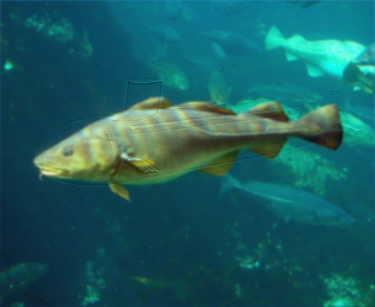


 Hybrid of  Fish (blur) and Submarine (high frequent) with sigma=6 :


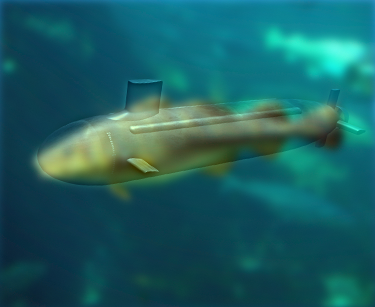


 Hybrid of  Fish (blur) and Submarine (high frequent) with sigma=11 :


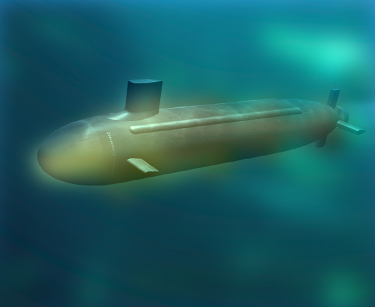

In [108]:
# experiment with the pair of 3a_fish.bmp and 3b_submarine.bmp
# with sigma 1, 4,11
print("\n Hybrid of Fish (blur) and Submarine (high frequent) images with sigma=1 :")
display(add_low_and_high_freq('3a_fish.bmp','3b_submarine.bmp', 1))

print("\n Hybrid of  Fish (blur) and Submarine (high frequent) with sigma=4 :")
display(add_low_and_high_freq('3a_fish.bmp','3b_submarine.bmp', 4))

print("\n Hybrid of  Fish (blur) and Submarine (high frequent) with sigma=11 :")
display(add_low_and_high_freq('3a_fish.bmp','3b_submarine.bmp', 11))


 Hybrid of Fish (blur) and Submarine (high frequent) images with sigma=1 :


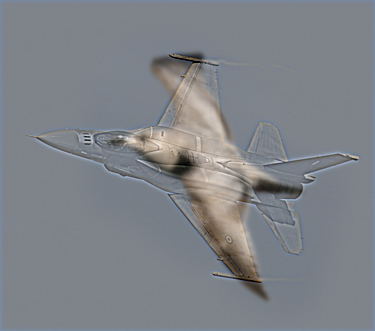


 Hybrid of  Fish (blur) and Submarine (high frequent) with sigma=4 :


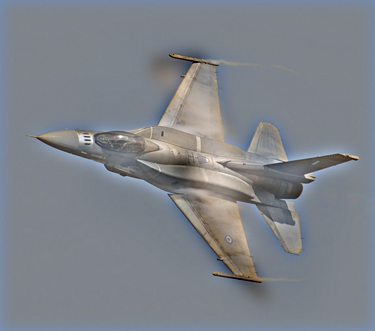


 Hybrid of  Fish (blur) and Submarine (high frequent) with sigma=11 :


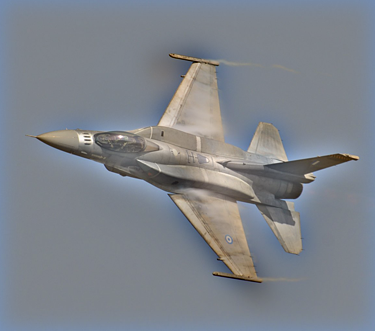

In [112]:
# experiment with the pair of 4a_bird.bmp and 4b_plane.bmp
# with sigma 2, 7, 12
print("\n Hybrid of Bird (blur) and Plan (high frequent) images with sigma=2 :")
display(add_low_and_high_freq('4a_bird.bmp','4b_plane.bmp', 2))

print("\n Hybrid of Bird (blur) and Plan (high frequent) with sigma=47:")
display(add_low_and_high_freq('4a_bird.bmp','4b_plane.bmp', 7))

print("\n Hybrid of Bird (blur) and Plan (high frequent) with sigma=12 :")
display(add_low_and_high_freq('4a_bird.bmp','4b_plane.bmp', 12))

# Part 4: Playing with Different Denoising Filters (9 points)

In [113]:
# from google.colab import files
# uploaded = files.upload()

Saving box_gauss.png to box_gauss.png
Saving box_speckle.png to box_speckle.png


#### 1.(6 points) Six denoised images

Original box_gauss image: 


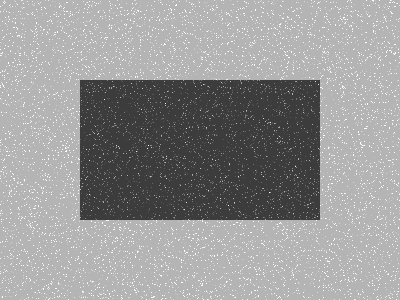


Original box_speckle image: 


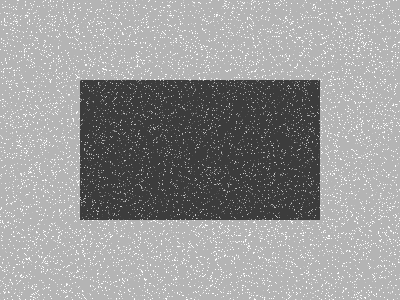


GaussianBlur applied to box_gauss image with parameters:
  Kernel Size: (5, 5), sigmaX: 10


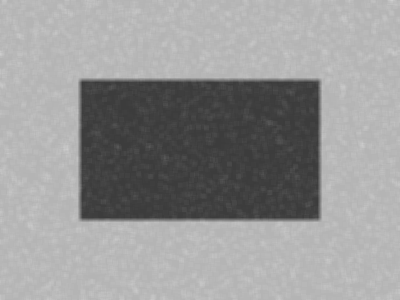


BilateralFilter applied to box_gauss image with parameters:
  d: 9, sigmaColor: 75, sigmaSpace: 75


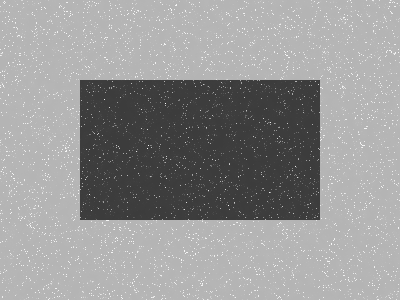


Median filter applied to box_gauss image with parameters:
  Kernel Size: 5


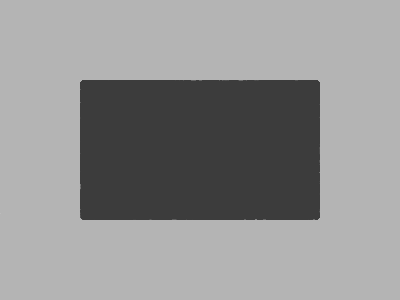


GaussianBlur applied to box_speckle image with parameters:
  Kernel Size: (5, 5), sigmaX: 10


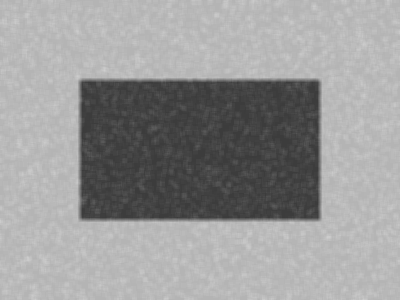


BilateralFilter applied to box_speckle image with parameters:
  d: 9, sigmaColor: 75, sigmaSpace: 75


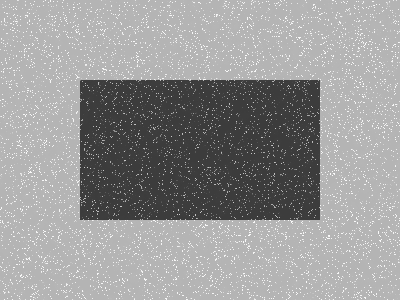


Median filter applied to box_speckle image with parameters:
  Kernel Size: 5


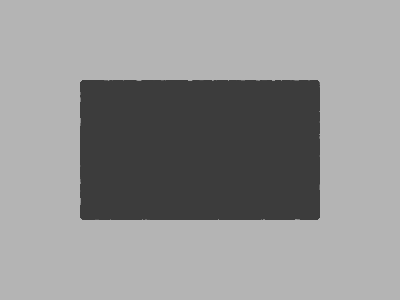

In [125]:
import cv2
# cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=50)
# cv2.bilateralFilter(img, 7, sigmaColor=150, sigmaSpace=150)
# cv2.medianBlur(img,7)

# Load the images
img_gauss = cv2.imread('box_gauss.png')
img_speckle = cv2.imread('box_speckle.png')
print("Original box_gauss image: ")
display(Image.fromarray(img_gauss))
print("\nOriginal box_speckle image: ")
display(Image.fromarray(img_speckle))

# Apply filters to the Gaussian noisy image and display
gauss_gaussian = cv2.GaussianBlur(img_gauss, ksize=(5, 5), sigmaX=10)
print("\nGaussianBlur applied to box_gauss image with parameters:")
print("  Kernel Size: (5, 5), sigmaX: 10")
display(Image.fromarray(gauss_gaussian))

gauss_bilateral = cv2.bilateralFilter(img_gauss, d=9, sigmaColor=75, sigmaSpace=75)
print("\nBilateralFilter applied to box_gauss image with parameters:")
print("  d: 9, sigmaColor: 75, sigmaSpace: 75")
display(Image.fromarray(gauss_bilateral))

gauss_median = cv2.medianBlur(img_gauss, 5)
print("\nMedian filter applied to box_gauss image with parameters:")
print("  Kernel Size: 5")
display(Image.fromarray(gauss_median))

# Apply filters to the Speckle noisy image
speckle_gaussian = cv2.GaussianBlur(img_speckle, ksize=(5, 5), sigmaX=10)
print("\nGaussianBlur applied to box_speckle image with parameters:")
print("  Kernel Size: (5, 5), sigmaX: 10")
display(Image.fromarray(speckle_gaussian))

speckle_bilateral = cv2.bilateralFilter(img_speckle, d=9, sigmaColor=75, sigmaSpace=75)
print("\nBilateralFilter applied to box_speckle image with parameters:")
print("  d: 9, sigmaColor: 75, sigmaSpace: 75")
display(Image.fromarray(speckle_bilateral))

speckle_median = cv2.medianBlur(img_speckle, 5)
print("\nMedian filter applied to box_speckle image with parameters:")
print("  Kernel Size: 5")
display(Image.fromarray(speckle_median))


#### 2.(3 points)


GaussianBlur applied to box_gauss image: 


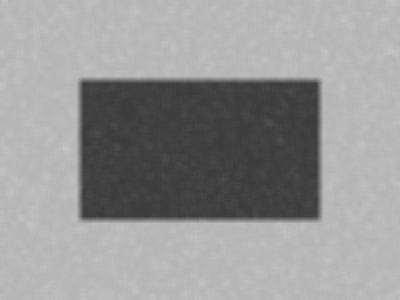


BilateralFilter applied to box_gauss image: 


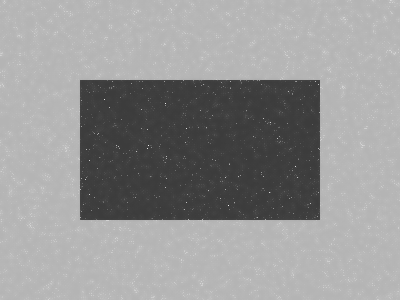


Median filter applied to box_gauss image: 


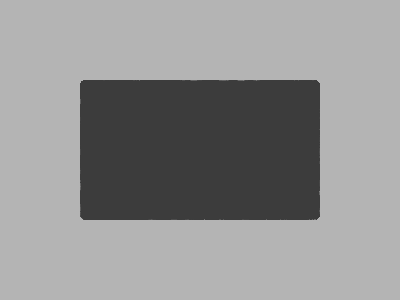


GaussianBlur applied to box_speckle image: 


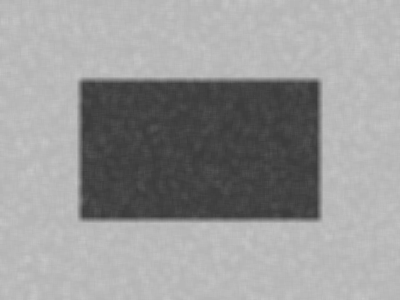


BilateralFilter applied to box_speckle image: 


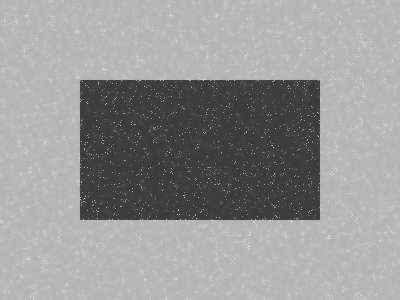


Median applied to box_speckle image: 


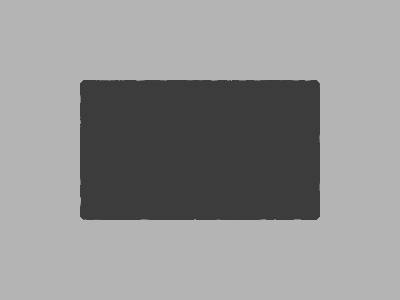

In [123]:

# Apply filters to the Gaussian noisy image and display
gauss_gaussian = cv2.GaussianBlur(img_gauss, ksize=(7, 7), sigmaX=50)
print("\nGaussianBlur applied to box_gauss image: ")
display(Image.fromarray(gauss_gaussian))

gauss_bilateral = cv2.bilateralFilter(img_gauss,7, sigmaColor=150, sigmaSpace=150)
print("\nBilateralFilter applied to box_gauss image: ")
display(Image.fromarray(gauss_bilateral))

gauss_median = cv2.medianBlur(img_gauss, 7)
print("\nMedian filter applied to box_gauss image: ")
display(Image.fromarray(gauss_median))

# Apply filters to the Speckle noisy image
speckle_gaussian = cv2.GaussianBlur(img_speckle, ksize=(7, 7), sigmaX=50)
print("\nGaussianBlur applied to box_speckle image: ")
display(Image.fromarray(speckle_gaussian))

speckle_bilateral = cv2.bilateralFilter(img_speckle,7, sigmaColor=150, sigmaSpace=150)
print("\nBilateralFilter applied to box_speckle image: ")
display(Image.fromarray(speckle_bilateral))

speckle_median = cv2.medianBlur(img_speckle, 7)
print("\nMedian applied to box_speckle image: ")
display(Image.fromarray(speckle_median))

**Comment the pros and cons of using Gaussian, Bilateral, and Median filter**

_The `Gaussian` filter works well for smoothing and removing Gaussian noise; however, it can blur edges and reduce image sharpness, especially at high sigma values, and still leaves blurred speckles. The `Bilateral` filter preserves edges while denoising by considering both spatial proximity and intensity similarity, but it introduces artifacts such as slight color bleeding, especially at high values of `sigmaColor` and `sigmaSpace`, and does not remove speckles as effectively as the `Median` filter. The `Median` filter is particularly effective for removing salt-and-pepper noise without blurring edges, as it replaces each pixel with the median of its neighbors. While it preserves edges better than Gaussian, it can still leave some small artifacts or dents along the edge lines._
